<a href="https://colab.research.google.com/github/jiminmini/mini/blob/main/5_26_%ED%95%84%EC%82%AC_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**[개념정리]**

#**평균 이동**

-중심을 군집의 중심으로 지속적으로 움직이면서 군집화 수행

-데이터의 분포도를 이용해 군집 중심점 찾음

-대역폭이 클수록 적은 수의 군집 중심점을 가짐

#**GMM 소개**

-가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것

-연속 확률 함수

-데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주

-모수 추정(개별 정규 분포의 평균과 분산, 각 데이터가 어떤 정규 분포에 해당되는지의 확률)



#**[코드 필사]**

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7,
                  random_state=0)
meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [2]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [3]:
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth, 3))

bandwidth 값: 1.816


In [4]:
import pandas as pd
clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y
 # estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)
meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print( 'cluster labels 유형 : ' ,np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2]


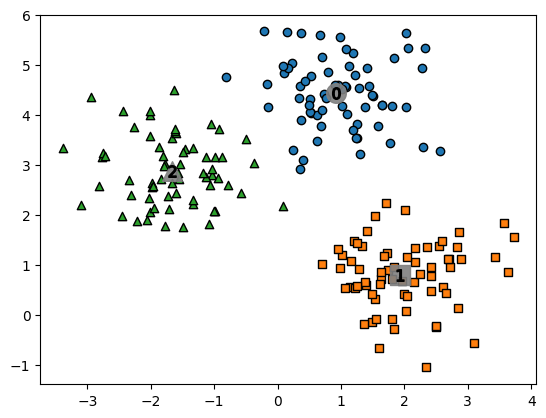

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label'] == label]
    center_x_y = centers[label]

    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
 # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray',
                alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                edgecolor='k', marker='$%d$' % label)
plt.show()

In [6]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


In [21]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
iris = load_iris()
feature_names = ['sepal_length', 'sepal_Width', 'petal_length', 'petal_width']
 # 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [8]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)
 # 군집화 결과를 irisDF의 'gmicluster' 칼럼명으로 저장
irisDF ['gmm_cluster' ]=gmm_cluster_labels
irisDF['target'] = iris.target
 # target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인.
iris_result = irisDF.groupby(['target' ])['gmm_cluster' ]. value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: count, dtype: int64


In [18]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,
                random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 47
        2                  3
2       2                 36
        0                 14
Name: count, dtype: int64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_cluster_plot(cluster_model, X, cluster_labels, iscenter=True):
    import numpy as np

    unique_labels = np.unique(cluster_labels)
    markers = ['o', 's', '^', 'x', '*', 'P', 'D']

    for label in unique_labels:
        label_cluster = X[cluster_labels == label]
        plt.scatter(label_cluster[:, 0], label_cluster[:, 1],
                    marker=markers[label % len(markers)], label=f'Cluster {label}')

    if iscenter:
        centers = cluster_model.cluster_centers_
        plt.scatter(centers[:, 0], centers[:, 1], s=200, c='white', edgecolor='k', marker='o')
        for idx, center in enumerate(centers):
            plt.scatter(center[0], center[1], s=100, c='black', marker=f'${idx}$')

    plt.title('Clustered Data')
    plt.legend()
    plt.grid(True)
    plt.show()


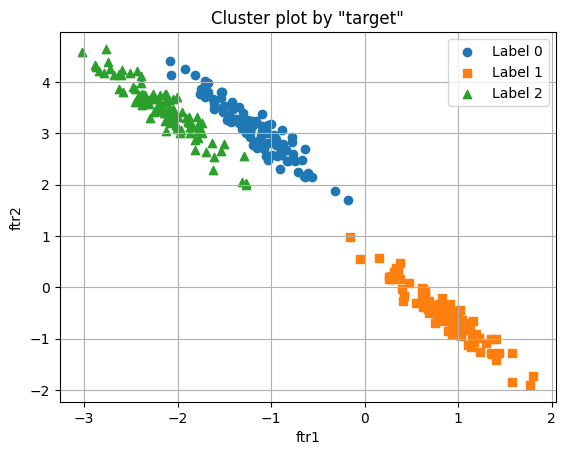

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 1. 데이터 생성 및 변형
X, y = make_blobs(n_samples=300, n_features=2, centers=3,
                  cluster_std=0.5, random_state=0)
transformation = [[0.60834549, -0.63667341],
                  [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# 2. 데이터프레임으로 변환
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1','ftr2'])
clusterDF['target'] = y

# 3. 시각화 함수 정의
def visualize_cluster_plot_by_column(df, colname):
    unique_labels = df[colname].unique()
    markers = ['o', 's', '^', 'x', '*', 'P', 'D']

    for label in unique_labels:
        cluster = df[df[colname] == label]
        plt.scatter(cluster['ftr1'], cluster['ftr2'],
                    marker=markers[label % len(markers)], label=f'Label {label}')

    plt.title(f'Cluster plot by "{colname}"')
    plt.xlabel('ftr1')
    plt.ylabel('ftr2')
    plt.legend()
    plt.grid(True)
    plt.show()

# 4. 시각화 실행
visualize_cluster_plot_by_column(clusterDF, 'target')


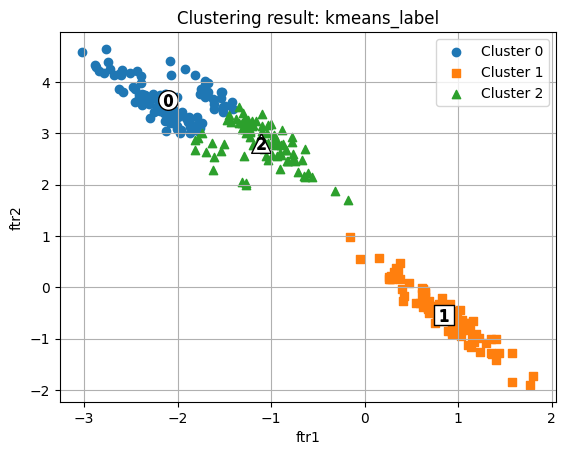

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. 데이터 생성 및 변형
X, y = make_blobs(n_samples=300, n_features=2, centers=3,
                  cluster_std=0.5, random_state=0)
transformation = [[0.60834549, -0.63667341],
                  [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# 2. DataFrame으로 변환
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1','ftr2'])

# 3. KMeans 적용
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label
centers = kmeans.cluster_centers_

# 4. 시각화 함수 정의
def visualize_cluster_plot(model, df, label_name, iscenter=True):
    unique_labels = df[label_name].unique()
    markers = ['o', 's', '^', 'x', '*', 'P', 'D']

    for label in unique_labels:
        cluster = df[df[label_name] == label]
        plt.scatter(cluster['ftr1'], cluster['ftr2'],
                    marker=markers[label % len(markers)],
                    label=f'Cluster {label}')

        if iscenter and model is not None:
            center = model.cluster_centers_[label]
            plt.scatter(center[0], center[1], s=200, c='white',
                        edgecolors='k', marker=markers[label % len(markers)])
            plt.scatter(center[0], center[1], s=70, c='k',
                        edgecolors='k', marker=f"${label}$")

    plt.title(f'Clustering result: {label_name}')
    plt.xlabel('ftr1')
    plt.ylabel('ftr2')
    plt.legend()
    plt.grid(True)
    plt.show()

# 5. 시각화 실행
visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)


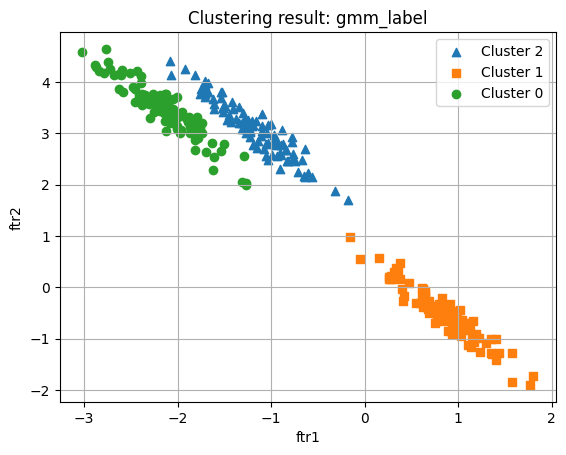

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

# 1. 데이터 생성 및 변형
X, y = make_blobs(n_samples=300, n_features=2, centers=3,
                  cluster_std=0.5, random_state=0)
transformation = [[0.60834549, -0.63667341],
                  [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# 2. DataFrame으로 변환
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1','ftr2'])

# 3. GaussianMixture 모델 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# 4. 시각화 함수 정의
def visualize_cluster_plot(model, df, label_name, iscenter=True):
    unique_labels = df[label_name].unique()
    markers = ['o', 's', '^', 'x', '*', 'P', 'D']

    for label in unique_labels:
        cluster = df[df[label_name] == label]
        plt.scatter(cluster['ftr1'], cluster['ftr2'],
                    marker=markers[label % len(markers)],
                    label=f'Cluster {label}')

        if iscenter and hasattr(model, 'cluster_centers_'):
            # GaussianMixture는 중심을 제공하지 않기 때문에 이 부분을 제외
            center = model.cluster_centers_[label]
            plt.scatter(center[0], center[1], s=200, c='white',
                        edgecolors='k', marker=markers[label % len(markers)])
            plt.scatter(center[0], center[1], s=70, c='k',
                        edgecolors='k', marker=f"${label}$")

    plt.title(f'Clustering result: {label_name}')
    plt.xlabel('ftr1')
    plt.ylabel('ftr2')
    plt.legend()
    plt.grid(True)
    plt.show()

# 5. 시각화 실행
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)


In [29]:
# 올바른 방식으로 다시 생성
clusterDF = pd.DataFrame()
clusterDF['ftr1'] = iris.data[:, 2]  # petal length
clusterDF['ftr2'] = iris.data[:, 3]  # petal width

# 이제 길이 맞음 (150행)
print(clusterDF.shape)  # (150, 2)

# 클러스터링
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

kmeans = KMeans(n_clusters=3, random_state=0)
clusterDF['kmeans_label'] = kmeans.fit_predict(clusterDF)

gmm = GaussianMixture(n_components=3, random_state=0)
clusterDF['gmm_label'] = gmm.fit_predict(clusterDF)

# target 추가
clusterDF['target'] = iris.target  # ✅ 이제 길이 일치함 (150개)


(150, 2)


In [30]:
print('### KMeans Clustering ###')
print (clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')[ 'gmm_label' ].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       1               50
1       0               48
        2                2
2       2               46
        0                4
Name: count, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            50
1       0            48
        1             2
2       1            46
        0             4
Name: count, dtype: int64
